<a href="https://colab.research.google.com/github/yeyxo/Project2/blob/main/Katy_Perry_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applying the Random Forest Classifer**



In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#import the KatyPerry data

link = 'https://drive.google.com/file/d/1cuEP5AlaPL6hs1LWM97L41cFIJrJHAgq/view?usp=sharing'
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('KatyPerry.csv') 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import gensim
import re
#1=spam 0=comment
KatyPerry = pd.read_csv('KatyPerry.csv')
KatyPerry.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [ ]:
KatyPerry = pd.read_csv('KatyPerry.csv', usecols = ['CLASS', 'CONTENT'])
KatyPerry.head()

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1


Cleaning up the content colum by removing punctuation



In [ ]:
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
print(STOPWORDS)
import string 
KatyPerry['CONTENT']=[re.sub(r'\W',' ',str(x)) for x in KatyPerry['CONTENT']]
KatyPerry['CONTENT'] = KatyPerry['CONTENT'].str.replace(r'[^\w\s]+', '')
KatyPerry

frozenset({'into', 'here', 'towards', 'behind', 'ever', 'moreover', 'wherever', 'whom', 'done', 'never', 'make', 'had', 'were', 'beforehand', 'will', 'very', 'keep', 'himself', 'i', 'sincere', 'another', 'hundred', 'but', 'as', 'hence', 'that', 'take', 'across', 'then', 'doesn', 'find', 'down', 'being', 'while', 'didn', 'top', 'has', 'my', 'eg', 'except', 'become', 'themselves', 'kg', 'your', 'neither', 'sixty', 'nowhere', 'this', 'out', 'namely', 'at', 'once', 'he', 'with', 'was', 'much', 'myself', 'well', 'against', 'can', 'which', 'made', 'everywhere', 'whole', 'becoming', 'be', 'itself', 'two', 'should', 'have', 'both', 'would', 'km', 'hasnt', 'amongst', 'detail', 'why', 'since', 'on', 'the', 'five', 'me', 'formerly', 'rather', 'thru', 'are', 'cry', 'less', 'because', 'none', 'also', 'between', 'show', 'due', 'de', 'somehow', 'besides', 'if', 'elsewhere', 'first', 'fire', 'say', 'off', 'along', 'already', 'three', 'therefore', 'seem', 'others', 'latterly', 'although', 'these', 'up'

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http www billboard com articles columns pop ...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http psnboss com ref 2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone Watch this trailer http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,lt 3,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,KATY PERRY I AM THE DÉCIO CABELO DECIO HA...,1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #Import Random Forest Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics



In [ ]:
vectorizer = TfidfVectorizer (stop_words=STOPWORDS)
features = vectorizer.fit_transform(KatyPerry['CONTENT']).toarray()

In [ ]:
from sklearn import preprocessing
X = features #Features
y = KatyPerry['CLASS'] # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test



In [ ]:
clf=RandomForestClassifier(n_estimators=100) #Create a Gaussian Classifier

clf.fit(X_train,y_train) #Train the model using the training sets y_pred=clf.predict(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9047619047619048


### **Apply LIME to explain on the Random Forest Classifer**


In [ ]:
!pip install lime


In [ ]:
import lime
from lime import lime_tabular
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
c = make_pipeline(vectorizer,clf)

In [ ]:
print(c.predict_proba([KatyPerry['CONTENT'][0]]))

[[0.01 0.99]]


In [ ]:
# 1 is SPAM, 0 is NOT SPAM
class_names=[0,1]
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx=5
exp = explainer.explain_instance(KatyPerry['CONTENT'][idx], c.predict_proba, num_features=10)
print('Document id: %d' % idx)
print('Probability(1) =', c.predict_proba([KatyPerry['CONTENT'][idx]])[0, 1])
print('True class: %s' % class_names[KatyPerry['CLASS'][idx]])

Document id: 5
Probability(1) = 1.0
True class: 1


In [ ]:
exp.as_list()


[('com', 0.18641177678129453),
 ('check', 0.1484752887922044),
 ('https', 0.08903758859325925),
 ('follow', 0.08574935782824188),
 ('guys', 0.048970658952833604),
 ('like', -0.04215813900343762),
 ('soundcloud', 0.029465424902251725),
 ('rapper', 0.023566726889415364),
 ('jkork', 0.016269969581881528),
 ('hope', 0.014913162672122643)]

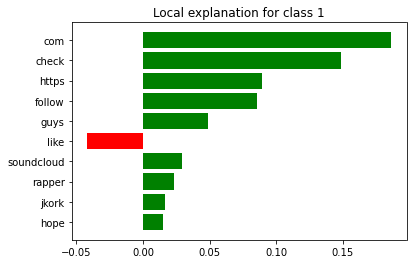

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()